# Importing Libraries and Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!pip install sklearn_crfsuite

     |████████████████████████████████| 747kB 6.6MB/s 


In [ ]:
import glob
import json
import nltk


In [ ]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
newStop = ['was', 'and', 'the', 'to', 'in', 'of', 'a', 'an', 'is', 'were', 'for', 'with', 'are', 'one', 'our', 'gave', 'have',
           'me', 'an', 'i', 'or', 'had', 'did', 'get', 'made', 'take', 'given', 'told', 'let', 'us', "n't", 'air', 'one', 'two', 'three', 
          'four', 'five', 'thousand', 'cc', 'twenty', 'ten']
stop_words = stop_words+newStop
stop_words.remove('not')

In [ ]:
path = r'/content/drive/My Drive/Practicum/Labelled'

In [ ]:
files = glob.glob(path+r'/*.json')
print(len(files))

21


In [ ]:
finInfo = []
for i in range(len(files)):
  for line in open(files[i], encoding='utf-8'):
    info = json.loads(line) 
  finInfo.append(info)
print(len(finInfo))

21


In [ ]:
labels = []
for i in range(len(finInfo)):
  info = finInfo[i]
  for j in range(len(info)):
    if (info[j]['Details'] != []):
      lbls = info[j]['Labels']
      for k in range(len(lbls)):
        for p,q in lbls[k].items():
          for l in range(len(q)):
            labels.append(q[l])
finLabels = []
for i in range(len(labels)):
  new = labels[i].split()
  for j in range(len(new)):
    if new[j] not in stop_words:
      finLabels.append(new[j])

corpus = list(set(finLabels))

In [ ]:
len(corpus)

3087

In [ ]:
for i in range(len(finInfo)):
  info = finInfo[i]
  for j in range(len(info)):
    det = info[j]['Details']
    for k in range(len(det)):
      if (det[k][-1]) == 'b':
        det[k][-1] = 'o'

In [ ]:

details = []
for i in range(len(finInfo)):
  info = finInfo[i]
  for j in range(len(info)):
    dic = {}
    dic['id'] = info[j]['id']
    sent = info[j]['sentence']
    newSent = ' '.join(sent)
    dic['sentences'] = sent
    sentTkn = newSent.split()
    det = info[j]['Details']
    nli = []
    for k in range(len(det)):
      li = []
      for l in range(len(sentTkn)):
        if (det[k][0] == 1):  
          word = det[k][2][0]
          if word in corpus and word not in stop_words:
            if word == sentTkn[l]:
              if (l == 0):
                a = (word, det[k][2][1], det[k][1][0], det[k][1][1], det[k][2][2], det[k][3], '', sentTkn[l+1], det[k][4])
              elif (l == len(sentTkn)-1):
                a = (word, det[k][2][1], det[k][1][0], det[k][1][1], det[k][2][2], det[k][3], sentTkn[l-1], '', det[k][4])
              else:
                a = (word, det[k][2][1], det[k][1][0], det[k][1][1], det[k][2][2], det[k][3], sentTkn[l-1], sentTkn[l+1], det[k][4])
        else:
          word = det[k][1][0]
          if word in corpus and word not in stop_words:
            if word == sentTkn[l]:
              if (l == 0):
                a = (word, det[k][1][1], det[k][1][2], det[k][2][0], det[k][2][1], '', sentTkn[l+1], det[k][4])
              elif (l == len(sentTkn)-1):
                a = (word, det[k][1][1], det[k][1][2], det[k][2][0], det[k][2][1], sentTkn[l-1], '', det[k][4])
              else:
                a = (word, det[k][1][1], det[k][1][2], det[k][2][0], det[k][2][1], sentTkn[l-1], sentTkn[l+1], det[k][4])
        li.append(a)
      li = list(set(li))
      nli.append(li)
    dic['details'] = nli
    details.append(dic)

In [ ]:
len(details)

1803

In [ ]:
len(list)

# CRF

### Getting Data 

In [ ]:
data = []
for i in range(len(details)):
  if details[i]['details'] != []:
    det = details[i]['details'] 
    for d in det:
     for combos in d:
       data.append(combos)

In [ ]:
len(data)

68668

In [ ]:
len(list (set (data)))

35560

### Generating Features

In [ ]:
def word2features(doc):
    word = doc[0]
    wordPos = doc[1]
    depWord = doc[2]
    depWordPos = doc[3]
    depTag = doc[5]
    previousWord = doc[6]
    nextWord = doc[7]

    features = [
        'bias',
        'word.lower=' + word.lower(),
        'previousWord' + previousWord,
        'nextWord=' +nextWord,
        'wordLen=' + str(len(word)),
        'posTag=' + wordPos,
        'depWord=' + str (depWord),
        'depWordPos=' + depWordPos,
        'depTag=' + depTag
        
    ]


    return features

In [ ]:
def extract_features(doc):
    return [word2features(doc) for i in range(len(doc))]

In [ ]:
def get_labels(doc):
    return [doc[-1] for i in range(len(doc))]

### Getting dependent and independent variables

In [ ]:
X = [extract_features(doc) for doc in data]

In [ ]:
y = [get_labels(doc) for doc in data]

In [ ]:
len(X), len(y)

(68668, 68668)

### Splitting into training and test data

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn_crfsuite import CRF

### CRF model using Stoachastic Gradient descent with L2 regularization

In [ ]:
model = CRF(algorithm='l2sgd',
    max_iterations=100,
    all_possible_transitions=True)

In [ ]:
len(X_train), len(y_train)

(54934, 54934)

In [ ]:
for i in range(len(X_train)):
  print(type(X_train[i]))
  break;

<class 'list'>


In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CRF(algorithm='l2sgd', all_possible_states=None, all_possible_transitions=True,
    averaging=None, c=None, c1=None, c2=None, calibration_candidates=None,
    calibration_eta=None, calibration_max_trials=None, calibration_rate=None,
    calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
    gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
    max_linesearch=None, min_freq=None, model_filename=None, num_memories=None,
    pa_type=None, period=None, trainer_cls=None, variance=None, verbose=False)

### Getting metrics for evaluation

In [ ]:
from sklearn_crfsuite import metrics
 
y_pred = model.predict(X_test)
print(metrics.flat_accuracy_score(y_test, y_pred))
#print(metrics.flat_precision_score(y_test, y_pred))
print(metrics.flat_classification_report(y_test, y_pred))

0.9432260570695086
              precision    recall  f1-score   support

           c       0.95      0.90      0.93      4471
           e       0.92      0.94      0.93      5846
           f       0.97      0.93      0.95     16342
           i       0.88      0.90      0.89      7980
           o       0.96      0.94      0.95     34606
           p       0.97      0.96      0.96      8028
           s       0.90      0.97      0.94     14269
          st       0.94      0.95      0.94     26875

    accuracy                           0.94    118417
   macro avg       0.94      0.94      0.94    118417
weighted avg       0.94      0.94      0.94    118417



### Saving Trained Model and Evaluation Metrics of the model

In [ ]:
import pickle

In [ ]:
filename = '/finalized_crf_model.sav'

In [ ]:
pickle.dump(model, open(pathAR+filename, 'wb'))

In [ ]:
report = metrics.flat_classification_report(y_test, y_pred)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
ml = MultiLabelBinarizer()

In [ ]:
ml.fit(y_test)

MultiLabelBinarizer(classes=None, sparse_output=False)

In [ ]:
newy_test = ml.transform(y_test)

In [ ]:
newy_pred = ml.transform(y_pred)

In [ ]:
roc_auc = roc_auc_score(newy_test, newy_pred, average="macro")

In [ ]:
roc_auc

0.9658188763012202

In [ ]:
fpr, tpr, _ = roc_curve(newy_test.ravel(), newy_pred.ravel())

In [ ]:
precision, recall, _ = precision_recall_curve(newy_test.ravel(), newy_pred.ravel())

In [ ]:
errors = abs(newy_pred.ravel() - newy_test.ravel())

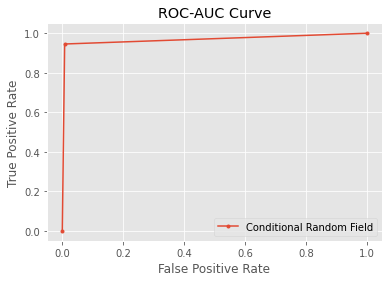

In [ ]:
fig, ax = pyplot.subplots()
ax.set_title("ROC-AUC Curve")
ax.plot(fpr, tpr, marker='.', label='Conditional Random Field')
# axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
## show the legend
ax.legend()

In [ ]:
fig.savefig(pathAR+r'/'+'crf_ROC AUC curve.png')

In [ ]:
ax.cla()

In [ ]:
  # plot the precision-recall curves
  ax.set_title("Precision-Recall Curves")
  ax.plot(recall, precision, marker='.', label='Conditional Random Field')
  ax.set_xlabel('Recall')
  ax.set_ylabel('Precision')
  

Text(27.125, 0.5, 'Precision')

In [ ]:
fig.savefig(pathAR+r'/'+'crf_Precision-Recall Curve.png')

In [ ]:
f1 = f1_score(newy_test.ravel(), newy_pred.ravel())

In [ ]:
ax.cla()

In [ ]:
txt = "Metrics for Condtional Random Field Trained on Original Data\n 1. ROC AUC Score: "+str(roc_auc)+"\t\n 2. F1 Score: "+str(f1)+"\t\n 3. Average absolute error: "+str(round(np.mean(errors), 2))+" degrees"

In [ ]:
txt

'Metrics for Condtional Random Field Trained on Original Data\n 1. ROC AUC Score: 0.9658188763012202\t\n 2. F1 Score: 0.9456094364351245\t\n 3. Average absolute error: 0.01 degrees'

In [ ]:
  text_file = open(pathAR+r'/'+"evaluation_metrics_crf.txt", 'w')
  n = text_file.write(txt)
  r = text_file.write("\n Classification Report is as follows\n"+report)
  text_file.close()

In [ ]:
def evaluations(model, y_test, y_pred, modelname):

  report = metrics.classification_report(y_test, y_pred)

  lb = LabelBinarizer()
  lb.fit(y_test)

  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)

  roc_auc = roc_auc_score(y_test, y_pred, average="macro")
  
  fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())

  precision, recall, _ = precision_recall_curve(y_test.ravel(), y_pred.ravel())


  errors = abs(y_pred.ravel() - y_test.ravel())

  fig, ax = pyplot.subplots()
  ax.set_title("ROC-AUC Curve")
  ax.plot(fpr, tpr, marker='.', label='Random Forest')
  # axis labels
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ## show the legend
  ax.legend()
  # show the plot
  fig.savefig(pathTA+r'/'+modelname+'_ROC-AUC Curve.png')

  ax.cla()
  # plot the precision-recall curves
  ax.set_title("Precision-Recall Curves")
  ax.plot(recall, precision, marker='.', label='Random Forest')
  ax.set_xlabel('Recall')
  ax.set_ylabel('Precision')
  fig.savefig(pathTA+r'/'+modelname+'_Precision-Recall Curve.png')

  f1 = f1_score(y_test.ravel(), y_pred.ravel())
  
  
  ax.cla()
  
  txt = "Metrics for Random Forest Trained on Original Data\n 1. ROC AUC Score: "+str(roc_auc)+"\t\n 2. F1 Score: "+str(f1)+"\t\n 3. Average absolute error: "+str(round(np.mean(errors), 2))+" degrees"

  text_file = open(pathTA+r'/'+"evaluation_metrics_"+modelname+".txt", 'w')
  n = text_file.write(txt)
  r = text_file.write("\n Classification Report is as follows\n"+report)
  text_file.close()

# Classification Part, DO NOT RUN, CODE only for reference

In [ ]:
import json
import glob
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import xml.etree.ElementTree as ET, getopt, logging, sys, random, re, copy, os
from lxml import etree
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

from keras import backend as K

import pickle

In [ ]:
def changeAspectTerm(dataframe, aspectterm, key):
  newdf = pd.DataFrame()
  newdf['id'] = dataframe['id']
  newdf['word'] = dataframe[aspectterm]
  newdf['Aspect'] = key+'_'+dataframe['Aspect'].str.lower().astype(str)
  newdf['id_updated'] = dataframe['id_updated']

  return newdf

In [ ]:
df = pd.read_csv(pathAR+r'/FinalCabinAspects.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'Cabin', 'Aspect', 'id_updated'], dtype='object')

In [ ]:
newdf = changeAspectTerm(df, 'Cabin', 'cabin')

In [ ]:
newdf.head()

,id,word,Aspect,id_updated
0,2970.0,dirty,cabin_condition,2970.0
1,2970.0,cabin,cabin_condition,2970.0
2,2970.0,uncomfortably,cabin_condition,2970.0
3,2970.0,cold,cabin_temperature,2970.0
4,2970.0,temperature,cabin_temperature,2970.0


In [ ]:
totLst = []
totLst.append(newdf)

In [ ]:
len(totLst[-1]), len(newdf)

(481, 481)

In [ ]:
len(totLst)

1

In [ ]:
df_aspect = pd.DataFrame()

In [ ]:
df_aspect=pd.concat(totLst, ignore_index=True)

In [ ]:
df_aspect.sample(10)

,id,word,Aspect,id_updated
93,3383.0,space,cabin_size,3383.0
436,3802.0,offputting,cabin_condition,3802.0
276,3558.0,temperature,cabin_temperature,3558.0
51,3200.0,cabin,cabin_condition,3200.0
192,3502.0,broke,cabin_temperature,3502.0
317,3626.0,were,cabin_condition,3626.0
194,3503.0,of,cabin_condition,3503.0
444,3811.0,and,cabin_condition,3811.0
321,3626.0,tatters,cabin_condition,3626.0
27,3037.0,friendly,cabin_condition,3037.0


In [ ]:
len(df_aspect)

481

In [ ]:
pathAR = r'/content/drive/My Drive/Practicum/Labelled/AirlineRatings'

In [ ]:
filesAR = glob.glob(pathAR+r'/*.csv')

In [ ]:
pathTA = r'/content/drive/My Drive/Practicum/Labelled/TripAdvisor'

In [ ]:
filesTA = glob.glob(pathTA+r'/*.csv')

In [ ]:
totFiles = filesAR + filesTA

In [ ]:
len(totFiles)

16

In [ ]:
details = []
for i in range(len(finInfo)):
  info = finInfo[i]
  for j in range(len(info)):
    dic = {}
    ids = info[j]['id']
    dic['id'] = info[j]['id']
    sent = info[j]['sentence']
    newSent = ' '.join(sent)
    dic['sentences'] = sent
    sentTkn = newSent.split()
    det = info[j]['Details']
    nli = []
    for k in range(len(det)):
      li = []
      for l in range(len(sentTkn)):
        if (det[k][0] == 1):  
          word = det[k][2][0]
          if word in corpus and word not in stop_words:
            if word == sentTkn[l]:
              if (l == 0):
                a = (word, det[k][2][1], det[k][1][0], det[k][1][1], det[k][2][2], det[k][3], '', sentTkn[l+1], det[k][4], ids)
              elif (l == len(sentTkn)-1):
                a = (word, det[k][2][1], det[k][1][0], det[k][1][1], det[k][2][2], det[k][3], sentTkn[l-1], '', det[k][4], ids)
              else:
                a = (word, det[k][2][1], det[k][1][0], det[k][1][1], det[k][2][2], det[k][3], sentTkn[l-1], sentTkn[l+1], det[k][4], ids)
        else:
          word = det[k][1][0]
          if word in corpus and word not in stop_words:
            if word == sentTkn[l]:
              if (l == 0):
                a = (word, det[k][1][1], det[k][1][2], det[k][2][0], det[k][2][1], '', sentTkn[l+1], det[k][4])
              elif (l == len(sentTkn)-1):
                a = (word, det[k][1][1], det[k][1][2], det[k][2][0], det[k][2][1], sentTkn[l-1], '', det[k][4])
              else:
                a = (word, det[k][1][1], det[k][1][2], det[k][2][0], det[k][2][1], sentTkn[l-1], sentTkn[l+1], det[k][4])
        li.append(a)
      li = list(set(li))
      nli.append(li)
    dic['details'] = nli
    details.append(dic)

In [ ]:
len(details)

1803

In [ ]:
data = []
for i in range(len(details)):
    if details[i]['details'] != []:
        det = details[i]['details']
        for d in det:
            for combos in d:
                data.append(combos)

data = list(set(data))
            
print(len(data))

36226


In [ ]:
columns=['main','main_pos','dep','dep_pos','main_sent','dep_tag','prev','next','entity','id']
df_entity=pd.DataFrame(data)
df_entity.columns=columns

In [ ]:
len(df_entity)

36226

In [ ]:
df_entity.sample(20)

,main,main_pos,dep,dep_pos,main_sent,dep_tag,prev,next,entity,id
20691,onboard,RB,0,entertainment,NN,personal,and,e,None,NaN
8237,allowance,NN,change,VB,0,obj,baggage,but,b,3164.0
23695,attendant,NN,avail,NN,0,dep,some,who,st,3720.0
3315,great,JJ,improvement,NN,0.62,amod,a,improvement,i,3475.0
5675,luggage,NN,front,NN,0,conj:nor,checkin,for,p,846.0
21009,cramped,JJ,felt,VBD,0,xcomp,felt,in,s,3536.0
28043,pyjamas,NNS,0,amenity,NN,blanket,and,i,None,NaN
19131,receive,VB,0,not,RB,not,any,b,None,NaN
20153,expected,VBN,0,nice,JJ,above,seemed,st,None,NaN
29394,time,NN,playing,VBG,0,obl:at,the,of,o,10.0


In [ ]:
len(df_aspect), len(df_entity)

(481, 36226)

In [ ]:
df_data=pd.merge(df_entity, df_aspect, how='inner', left_on=['id','main'], right_on=['id','word'],
         left_index=False, right_index=False, sort=True)

In [ ]:
df_data.sample(10)

,main,main_pos,dep,dep_pos,main_sent,dep_tag,prev,next,entity,id,word,Aspect,id_updated
180,comfortable,JJ,nice,JJ,0.51,conj:and,and,even,c,3475.0,comfortable,cabin_condition,3475.0
124,bad,JJ,system,NN,-0.54,amod,very,food,c,3389.0,bad,cabin_size,3389.0
239,new,JJ,aircraft,NN,0,amod,boarding,comfortable,c,3531.0,new,cabin_condition,3531.0
236,clean,JJ,airport,NN,0.4,amod,huge,with,c,3521.0,clean,cabin_condition,3521.0
70,cabin,NN,crews,NNS,0,compound,by,crews,c,3200.0,cabin,cabin_condition,3200.0
72,toilets,NNS,check,NN,0,nmod:in,cabin,is,c,3200.0,toilets,cabin_condition,3200.0
88,comfortable,JJ,flight,NN,0.51,conj:and,very,i,s,3334.0,comfortable,cabin_condition,3334.0
262,not,RB,working,VBG,0,advmod,were,working,i,3553.0,not,cabin_condition,3553.0
74,renting,VBG,screen,NN,0,acl,screen,a,c,3257.0,renting,cabin_condition,3257.0
285,full,JJ,rating,NN,0,amod,completely,the,c,3566.0,full,cabin_condition,3566.0


In [ ]:
details[0]

{'details': [], 'id': 2945, 'sentences': ['aerlingus']}

In [ ]:
alltxt = []
for i in range(len(details)):
  for j in range(len(details[i]['sentences'])):
    alltxt.append(details[i]['sentences'][j])

In [ ]:
len(alltxt)

9331

In [ ]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(alltxt)

In [ ]:
#main dep prev next
# Text to sequence

df_data['main_s']=df_data['main'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: (x[0])[-1] if x!=[[]] else 0 )
df_data['dep_s']=df_data['dep'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: (x[0])[-1] if x!=[[]] else 0 )
df_data['prev_s']=df_data['prev'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: (x[0])[-1] if x!=[[]] else 0 )
df_data['next_s']=df_data['next'].apply( lambda x: tokenizer.texts_to_sequences([x])).apply(lambda x: (x[0])[-1] if x!=[[]] else 0 )

In [ ]:
#main_pos  dep_pos dep_tag
#One hot encoding 

df_main_pos=pd.get_dummies(df_data['main_pos'],prefix='main_pos')
df_dep_pos=pd.get_dummies(df_data['dep_pos'],prefix='dep_pos')
df_dep_tag=pd.get_dummies(df_data['dep_tag'],prefix='dep_tag')

df_data2=pd.concat([df_data,df_main_pos,df_dep_pos,df_dep_tag], axis=1)

In [ ]:
df_data2.head()

,main,main_pos,dep,dep_pos,main_sent,dep_tag,prev,next,entity,id,word,Aspect,id_updated,main_s,dep_s,prev_s,next_s,main_pos_AFX,main_pos_IN,main_pos_JJ,main_pos_JJR,main_pos_JJS,main_pos_NN,main_pos_NNS,main_pos_RB,main_pos_VB,main_pos_VBD,main_pos_VBG,main_pos_VBN,main_pos_VBZ,dep_pos_CD,dep_pos_IN,dep_pos_JJ,dep_pos_JJR,dep_pos_JJS,dep_pos_MD,dep_pos_NN,dep_pos_NNP,dep_pos_NNS,dep_pos_PRP,...,dep_tag_acl:to,dep_tag_advcl,dep_tag_advcl:like,dep_tag_advcl:though,dep_tag_advmod,dep_tag_amod,dep_tag_case,dep_tag_ccomp,dep_tag_compound,dep_tag_conj,dep_tag_conj:and,dep_tag_conj:but,dep_tag_conj:plus,dep_tag_csubj,dep_tag_csubj:pass,dep_tag_dep,dep_tag_nmod:between,dep_tag_nmod:for,dep_tag_nmod:from,dep_tag_nmod:in,dep_tag_nmod:of,dep_tag_nmod:on,dep_tag_nmod:with,dep_tag_nsubj,dep_tag_nsubj:pass,dep_tag_nsubj:xsubj,dep_tag_obj,dep_tag_obl:at,dep_tag_obl:for,dep_tag_obl:in,dep_tag_obl:into,dep_tag_obl:like,dep_tag_obl:npmod,dep_tag_obl:of,dep_tag_obl:on,dep_tag_obl:through,dep_tag_obl:to,dep_tag_obl:with,dep_tag_parataxis,dep_tag_xcomp
0,cabin,NN,everyone,NN,0,compound,dirty,and,st,2970.0,cabin,cabin_condition,2970.0,76,494,1165,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,cabin,NN,everyone,NN,0,compound,unfriendly,crew,c,2970.0,cabin,cabin_condition,2970.0,76,494,1650,65,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,cabin,NN,point,VBP,0,dep,dirty,and,st,2970.0,cabin,cabin_condition,2970.0,76,48,1165,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,cabin,NN,point,VBP,0,dep,cold,temperature,st,2970.0,cabin,cabin_condition,2970.0,76,48,768,1538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,cabin,NN,point,NN,0,dep,unfriendly,crew,st,2970.0,cabin,cabin_condition,2970.0,76,48,1650,65,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_data2=pd.concat([df_data,df_main_pos,df_dep_pos,df_dep_tag], axis=1)

new_columns=['main_s','dep_s', 'prev_s', 'next_s','main_sent'] + list(df_main_pos.columns)+ list(df_dep_pos.columns)+ list(df_dep_tag.columns)+['Aspect']
df_data3=df_data2[new_columns]

In [ ]:
len(list(df_data3.columns))

79

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def getPredictions(x_train, x_test, y_train, model):#, test):
    
    predictions = model.predict(x_test)
    return predictions

In [ ]:
def check_acc(pred,y_test):
    right=0
    for i in range(len(y_test)):
        if pred[i]==y_test.iloc[i]:
            right+=1
    return right/len(y_test)

In [ ]:
def classifyModel(dataframe, modelname):
  msk=(np.random.rand(len(dataframe)) < 0.8)
  train=dataframe[msk]
  test=dataframe[~msk]


  x_train=train[x_columns]
  x_test=test[x_columns]
  y_train=train['Aspect']
  y_test=test['Aspect']


  model = RandomForestClassifier(n_estimators=150)
  model.fit(x_train, y_train)
  with open(pathTA+r'/'+modelname+'.sav', 'wb') as f:
    pickle.dump(model, f)


  pred = getPredictions(x_train, x_test, y_train, model)

  return pred, y_test

In [ ]:
x_columns=['main_s','dep_s', 'prev_s', 'next_s','main_sent'] + list(df_main_pos.columns)+ list(df_dep_pos.columns)+ list(df_dep_tag.columns)

In [ ]:
df_data_food=df_data3[df_data3['Aspect'].str.contains("food")]
df_data_entertainment=df_data3[df_data3['Aspect'].str.contains("entertainment")]
df_data_cabin=df_data3[df_data3['Aspect'].str.contains("cabin")]
df_data_inflight=df_data3[df_data3['Aspect'].str.contains("inf")]
df_data_offflight=df_data3[df_data3['Aspect'].str.contains("off")]
df_data_possession=df_data3[df_data3['Aspect'].str.contains("possession")]
df_data_seat=df_data3[df_data3['Aspect'].str.contains("seat")]
df_data_staff=df_data3[df_data3['Aspect'].str.contains("staff")]

In [ ]:
df_data_entertainment = df_data_entertainment.replace({'entertainment_s':'entertainment_audio', 'entertainment_c': 'entertainment_general'})

In [ ]:
df_data_entertainment, df_data_cabin, df_data_food, df_data_inflight, df_data_offflight, df_data_possession, df_data_seat, df_data_staff

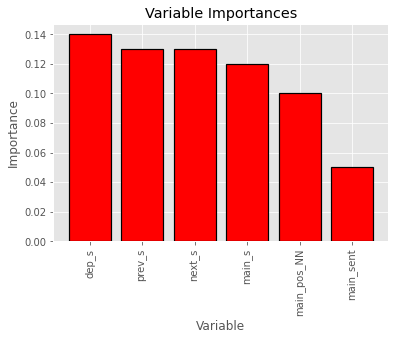

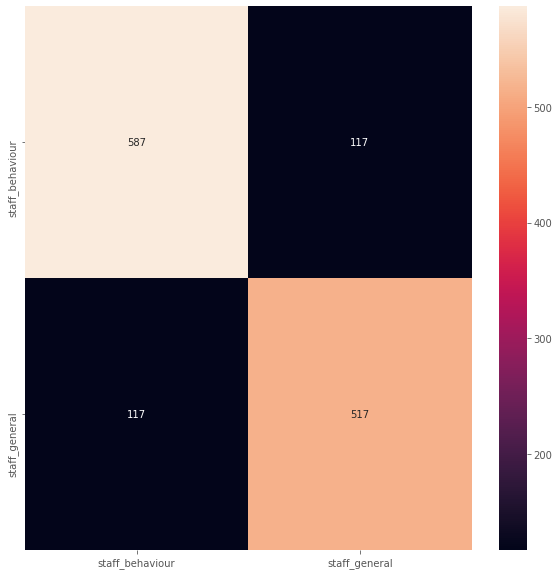

In [ ]:
predict_, test_ = classifyModel(df_data_staff, 'staff')

In [ ]:
check_acc(food_pred, food_test)

0.803448275862069

Score

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
from matplotlib import pyplot

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn import metrics

In [ ]:
def evaluations(model, y_test, y_pred, modelname):

  report = metrics.classification_report(y_test, y_pred)

  lb = LabelBinarizer()
  lb.fit(y_test)

  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)

  roc_auc = roc_auc_score(y_test, y_pred, average="macro")
  
  fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())

  precision, recall, _ = precision_recall_curve(y_test.ravel(), y_pred.ravel())


  errors = abs(y_pred.ravel() - y_test.ravel())

  fig, ax = pyplot.subplots()
  ax.set_title("ROC-AUC Curve")
  ax.plot(fpr, tpr, marker='.', label='Random Forest')
  # axis labels
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ## show the legend
  ax.legend()
  # show the plot
  fig.savefig(pathTA+r'/'+modelname+'_ROC-AUC Curve.png')

  ax.cla()
  # plot the precision-recall curves
  ax.set_title("Precision-Recall Curves")
  ax.plot(recall, precision, marker='.', label='Random Forest')
  ax.set_xlabel('Recall')
  ax.set_ylabel('Precision')
  fig.savefig(pathTA+r'/'+modelname+'_Precision-Recall Curve.png')

  f1 = f1_score(y_test.ravel(), y_pred.ravel())
  
  
  ax.cla()
  
  txt = "Metrics for Random Forest Trained on Original Data\n 1. ROC AUC Score: "+str(roc_auc)+"\t\n 2. F1 Score: "+str(f1)+"\t\n 3. Average absolute error: "+str(round(np.mean(errors), 2))+" degrees"

  text_file = open(pathTA+r'/'+"evaluation_metrics_"+modelname+".txt", 'w')
  n = text_file.write(txt)
  r = text_file.write("\n Classification Report is as follows\n"+report)
  text_file.close()

In [ ]:
def getImportant(model, feature_list, modelname):
  importances = list(model.feature_importances_)

  feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

  feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
  newimportances = []
  newfeaturelist = []
  for i in range(len(feature_importances)):
    if (i <= 5):
      newimportances.append(feature_importances[i][1])
      newfeaturelist.append(feature_importances[i][0])
  

  # list of x locations for plotting
  x_values = list(range(len(newimportances)))                             

  # Make a bar chart
  pyplot.bar(x_values, newimportances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

  # Tick labels for x axis
  pyplot.xticks(x_values, newfeaturelist, rotation='vertical')

  # Axis labels and title
  pyplot.ylabel('Importance')
  pyplot.xlabel('Variable')
  pyplot.title('Variable Importances')
  pyplot.savefig(pathTA+r'/'+modelname+'_Variable-Importances.png')

In [ ]:
def classifyModel(dataframe, modelname):
  msk=(np.random.rand(len(dataframe)) < 0.8)
  train=dataframe[msk]
  test=dataframe[~msk]


  x_train=train[x_columns]
  x_test=test[x_columns]
  y_train=train['Aspect']
  y_test=test['Aspect']

  feature_list = list(dataframe.columns)



  model = RandomForestClassifier(n_estimators=150)
  model.fit(x_train, y_train)
  with open(pathTA+r'/'+modelname+'.sav', 'wb') as f:
    pickle.dump(model, f)

  
  pred = getPredictions(x_train, x_test, y_train, model)

  
  evaluations(model, y_test, pred, modelname)

  getImportant(model, feature_list, modelname)

  labels = np.unique(y_test) 
  a = confusion_matrix(y_test, pred, labels=labels) 
  
  #print(a)

  cm_df = pd.DataFrame(a, index=labels, columns=labels)
  plt.figure(figsize=(10,10))  
  sns.heatmap(cm_df, annot=True, fmt='g')

  plt.savefig(pathTA+r'/'+modelname+'_Confusion Matrix.png')
  
  return pred, y_test

In [ ]:
model.decision_path()

In [ ]:
list(df_data_entertainment['Aspect'].unique())

['entertainment_audio', 'entertainment_visual', 'entertainment_general']